### Import required library for the regression problem

In [392]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Step 1 -Loading/injesting the data and data understanding

### Read the file 

In [393]:
bikesharing=pd.read_csv("E:/Anup/Study/ML_IIITB/Linear Regression/day.csv")
bikesharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Inspecting the loaded dataframe

In [394]:
bikesharing.shape
## 730 rows and 16 columns in the dataframe

(730, 16)

In [395]:
bikesharing.info()
## all are not null fields, hence not checking null percentage in each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [396]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [397]:
bikesharing.isin([0]).sum()

instant         0
dteday          0
season          0
yr            365
mnth            0
holiday       709
weekday       105
workingday    231
weathersit      0
temp            0
atemp           0
hum             1
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

### To check if linear regression can be applied on the data set or not?

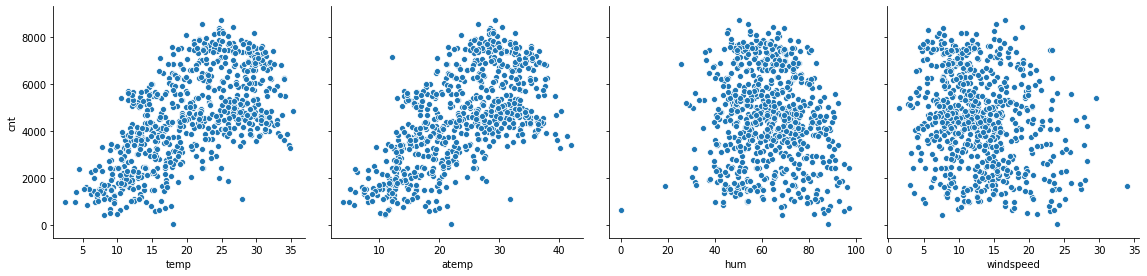

In [398]:
#### Numerical variable considered are-
list_numerical=['temp','atemp','hum','windspeed']
sns.pairplot(bikesharing,x_vars=list_numerical,y_vars=['cnt'],size=4)
plt.show()


Understanding established that there is a corelation between temperature and count as there is a positive correlation. Same is the case with atemp 

In [399]:
### Categorical variables considered are-
categorical_variable=['season','yr','mnth','holiday','weekday','workingday','weathersit']

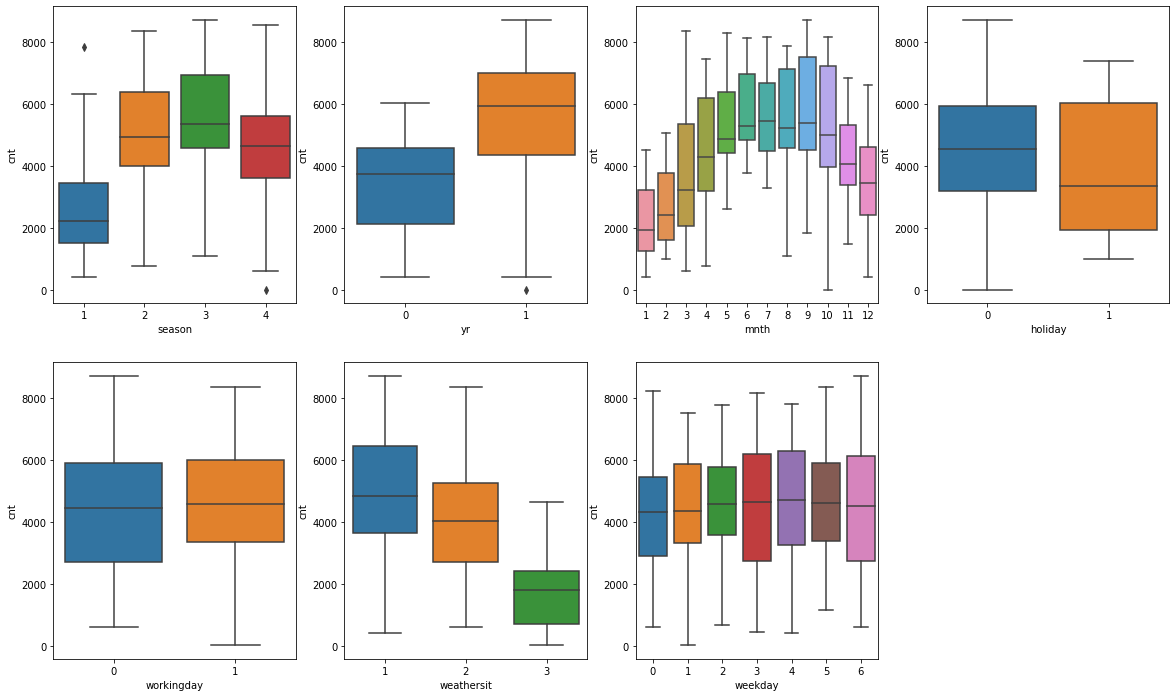

In [400]:
## Visualizing categorical variable
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(data=bikesharing,x='season',y='cnt')
plt.subplot(2,4,2)
sns.boxplot(data=bikesharing,x='yr',y='cnt')
plt.subplot(2,4,3)
sns.boxplot(data=bikesharing,x='mnth',y='cnt')
plt.subplot(2,4,4)
sns.boxplot(data=bikesharing,x='holiday',y='cnt')
plt.subplot(2,4,5)
sns.boxplot(data=bikesharing,x='workingday',y='cnt')
plt.subplot(2,4,6)
sns.boxplot(data=bikesharing,x='weathersit',y='cnt')
plt.subplot(2,4,7)
sns.boxplot(data=bikesharing,x='weekday',y='cnt')
plt.show()


Inferences established, that:
 - Median for season 3 is significantly higher compared to other seasons and overall disstribution of count is significant for season 3. So there is some relation ship between categorical variable season and count of bike users
 - Median for year 2019 is higher when compared with that of 2018 and overall distribution is on higher side on 2019. With available information it seems count increases per year.
 - Weather (1) , median and count distribution is significantly better compared to the other two weather category 

With the above analysis it is conclusive that multiple linear regression model is ideal for this problem.

## Step 2- Data Preparation Activities

### Creating dummy variables for introducing categorical variable

In [401]:
## Remove  columns not required.
bikesharing=bikesharing.drop('dteday',axis=1)
bikesharing=bikesharing.drop('casual',axis=1)
bikesharing=bikesharing.drop('mnth',axis=1)
bikesharing=bikesharing.drop('instant',axis=1)


In [441]:
## Creting dummy variable for season
season=pd.get_dummies(bikesharing['season'],drop_first=True)
season.columns=['summer','fall','winter']
season.head()

KeyError: 'season'

In [403]:
## Concatenate dummy variables with actual
bikesharing=pd.concat([bikesharing,season],axis=1)
bikesharing=bikesharing.drop('season',axis=1)
bikesharing.head(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt,summer,fall,winter
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600,0,0,0


In [404]:
## Creting dummy variable for weathersit

weather=pd.get_dummies(bikesharing['weathersit'],drop_first=True)
#weather.columns=['summer','fall','winter']
weather_label=[]
for i in  weather.columns:
    if i == 1:
        weather_label.append('Clear')
    elif i==2:
        weather_label.append('Mist_Cloudy')
    elif i==3:
        weather_label.append('Light_Snow_Rain')
    elif i==4:
        weather_label.append('Heavy Rain_Fog')
        
weather.columns=weather_label
weather.head(5)

,Mist_Cloudy,Light_Snow_Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [405]:
## Concatenate dummy variables with actual
bikesharing=pd.concat([bikesharing,weather],axis=1)
bikesharing=bikesharing.drop('weathersit',axis=1)
bikesharing.head(5)

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,registered,cnt,summer,fall,winter,Mist_Cloudy,Light_Snow_Rain
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,654,985,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,670,801,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1454,1562,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1518,1600,0,0,0,0,0


In [406]:
## Creting dummy variable for day of the week
## Creating new categorical variable - weekend , if day of the week in 0 or 6 then weekend =1 else 0
bikesharing['weekend']=bikesharing.weekday.apply(lambda x: 1 if x in (0,6) else 0)
## Dropping week day
bikesharing=bikesharing.drop('weekday',axis=1)
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,summer,fall,winter,Mist_Cloudy,Light_Snow_Rain,weekend
0,0,0,0,14.110847,18.18125,80.5833,10.749882,654,985,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,670,801,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1229,1349,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1454,1562,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1518,1600,0,0,0,0,0,0


### Splitting test and train data

In [407]:
df_train,df_test=train_test_split(bikesharing,train_size=0.7,random_state=100)
df_train.head()
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,summer,fall,winter,Mist_Cloudy,Light_Snow_Rain,weekend
184,0,1,0,29.793347,33.27085,63.7917,5.459106,2978,6043,0,1,0,1,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,5339,6211,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2419,2659,0,0,1,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,3896,4780,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4232,4968,1,0,0,0,0,0


In [408]:
scaler=MinMaxScaler()
num_vars=['cnt','atemp','hum','windspeed']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,cnt,atemp,hum,windspeed
576,0.827658,0.766351,0.725633,0.264686
426,0.465255,0.438975,0.640189,0.255342
728,0.204096,0.200348,0.498067,0.663106
482,0.482973,0.391735,0.504508,0.188475
111,0.191095,0.318819,0.751824,0.380981


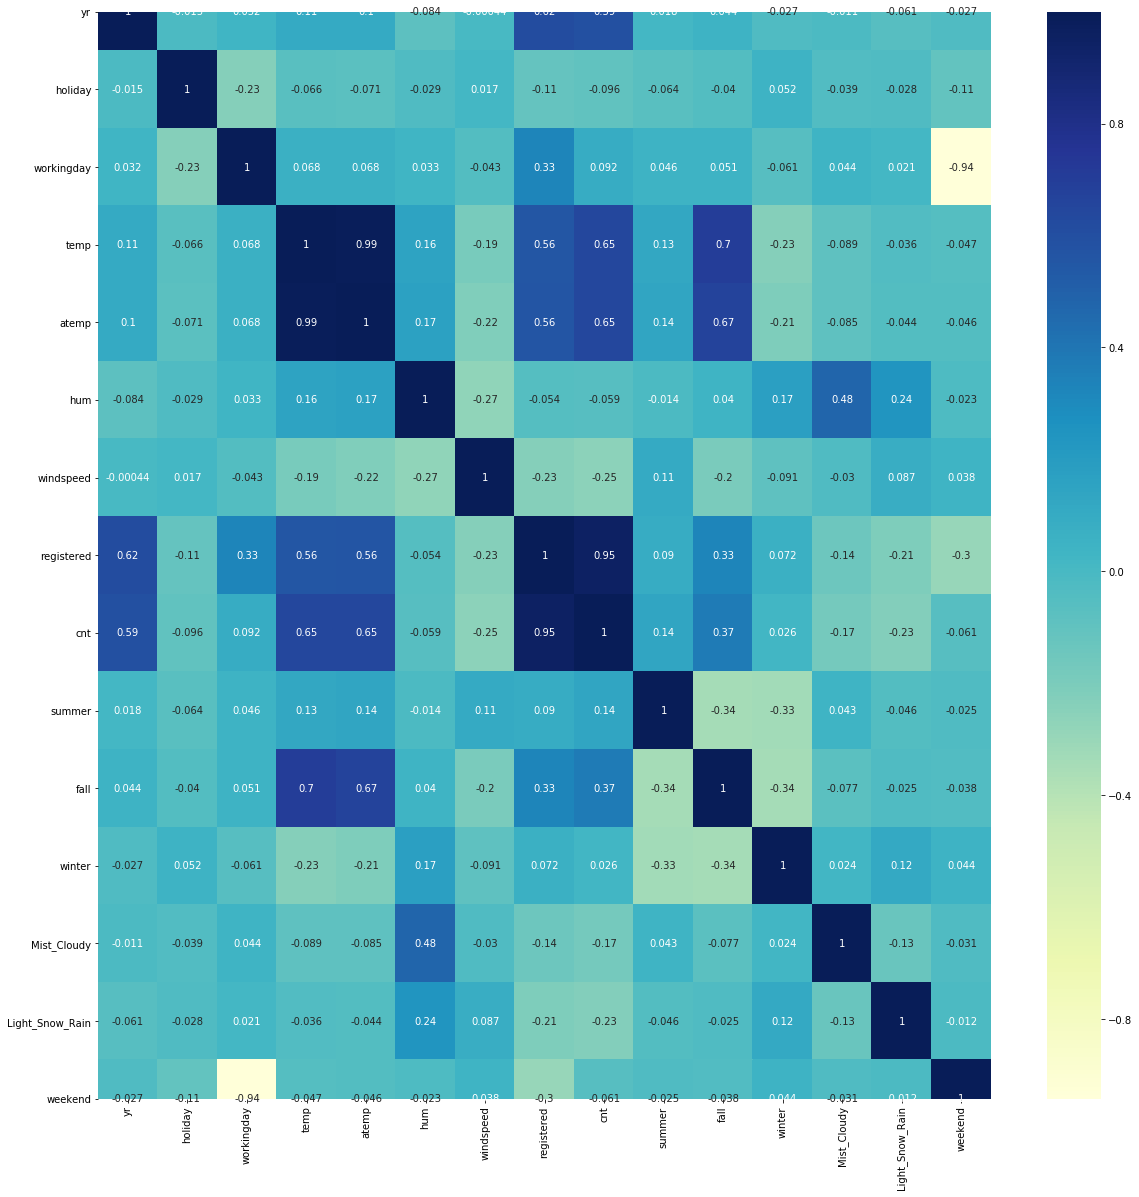

In [409]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [410]:
y_train=df_train.pop('cnt')
X_train=df_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [411]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1221.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:53:51   Log-Likelihood:                 930.60
No. Observations:                 510   AIC:                            -1833.
Df Residuals:                     496   BIC:                            -1774.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0028      0.010      0.282      0.778      -0.017       0.022
yr                 -0.0008      0.006     -0.134      0.894      -0.013       0.011
holiday             0.0079      0.009      0.890      0.374      -0.010       0.025
workingday         -0.0592      0.005    -11.139      0.000      -0.070      -0.049
temp                0.0050      0.002      2.791      0.005       0.001       0.009
atemp              -0.0416      0.060     -0.689      0.491      -0.160       0.077
hum                -0.0316      0.017     -1.905      0.057      -0.064       0.001
windspeed          -0.0430      0.012     -3.629      0.000      -0.066      -0.020
registered          0.0001   2.78e-06     48.161      0.000       0.000       0.000
summer              0.0239      0.007      3.533      0.000       0.011       0.037
fall               -0.0047      0.009     -0.528      0.598      -0.022       0.013
winter             -0.0053      0.007     -0.802      0.423      -0.018       0.008
Mist_Cloudy        -0.0040      0.005     -0.856      0.393      -0.013       0.005
Light_Snow_Rain    -0.0120      0.013     -0.961      0.337      -0.037       0.013
weekend             0.0541      0.005     11.235      0.000       0.045       0.064
==============================================================================
Omnibus:                       81.535   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.676
Skew:                           0.905   Prob(JB):                     3.50e-35
Kurtosis:                       5.048   Cond. No.                     1.51e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.53e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Check VIF of individual predictors

In [412]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,58.45
4,atemp,53.45
2,workingday,40.38
13,weekend,16.36
7,registered,6.24
9,fall,5.03
0,yr,2.91
8,summer,2.78
10,winter,2.61
1,holiday,2.30


VIF & P value of atemp is high, hence removing atemp and building model again 

In [413]:
#X_train_sm_new=X_train_sm
#X_train_sm_new.pop('atemp')
#lr=sm.OLS(y_train,X_train_sm_new)
#lr_model=lr.fit()
#lr_model.summary()

In [414]:
#vif = pd.DataFrame()
#X = X_train_sm_new
#X=X.drop(['const'],axis=1)
#vif['Features'] = X.columns
#vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

#### Identifying top 10 variable using RFE

In [415]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [416]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('registered', False, 5),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('weekend', False, 3)]

In [417]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'Mist_Cloudy', 'Light_Snow_Rain'],
      dtype='object')

In [418]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [419]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [420]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [421]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.1
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          1.72e-180
Time:                        21:53:52   Log-Likelihood:                 480.51
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     499   BIC:                            -892.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2167      0.028     

In [422]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'registered', 'summer', 'fall', 'winter', 'Mist_Cloudy',
       'Light_Snow_Rain', 'weekend'],
      dtype='object')

In [423]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,21.43
3,hum,15.34
6,fall,5.93
4,windspeed,3.59
5,summer,3.32
7,winter,2.48
8,Mist_Cloudy,2.13
0,yr,2.02
9,Light_Snow_Rain,1.18
1,holiday,1.04


VIF of the variable atemp is high but on removing atemp, r squared reduced more than 5 %. Hence removing the variable hum and check whether this cause any significance drop in R squared value

In [424]:
X_train_rfe_new = X_train[col]
X_train_rfe_new.pop('hum')
X_train_rfe_new_sm=sm.add_constant(X_train_rfe_new)

In [425]:
lm = sm.OLS(y_train,X_train_rfe_new_sm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.8
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          4.69e-179
Time:                        21:53:52   Log-Likelihood:                 474.26
No. Observations:                 510   AIC:                            -928.5
Df Residuals:                     500   BIC:                            -886.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1390      0.018     

In [426]:
### Checking VIF 

In [427]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,13.06
5,fall,5.66
4,summer,3.28
3,windspeed,3.15
6,winter,2.39
0,yr,2.01
7,Mist_Cloudy,1.47
8,Light_Snow_Rain,1.08
1,holiday,1.03


In [428]:
### removing fall and validating the r square

In [429]:
X_train_rfe_new.pop('fall')
X_train_rfe_new_sm=sm.add_constant(X_train_rfe_new)
X_train_rfe_new.head()

,yr,holiday,atemp,windspeed,summer,winter,Mist_Cloudy,Light_Snow_Rain
576,1,0,0.766351,0.264686,0,0,0,0
426,1,0,0.438975,0.255342,0,0,1,0
728,1,0,0.200348,0.663106,0,0,0,0
482,1,0,0.391735,0.188475,1,0,1,0
111,0,0,0.318819,0.380981,1,0,1,0


In [430]:
lm = sm.OLS(y_train,X_train_rfe_new_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     265.3
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          1.05e-174
Time:                        21:53:52   Log-Likelihood:                 461.12
No. Observations:                 510   AIC:                            -904.2
Df Residuals:                     501   BIC:                            -866.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1210      0.018     

In [431]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.34
3,windspeed,2.99
0,yr,2.00
4,summer,1.52
6,Mist_Cloudy,1.47
5,winter,1.38
7,Light_Snow_Rain,1.08
1,holiday,1.03


## Residual Analysis of the train data

In [432]:
y_train_count = lm.predict(X_train_rfe_new_sm)

In [433]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

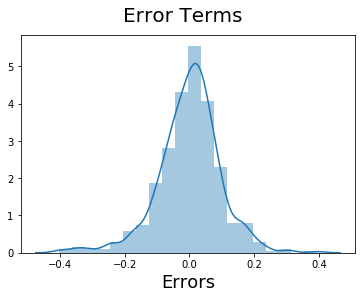

In [434]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [435]:
#### Applying the scaling on the test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [436]:
y_test = df_test.pop('cnt')
X_test = df_test

In [437]:
X_test_new = X_test[X_train_rfe_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [438]:
# Making predictions
y_pred = lm.predict(X_test_new)

#print(X_train_rfe.columns)
#print(X_test_new.columns)

### Model Evaluation

Text(0, 0.5, 'y_pred')

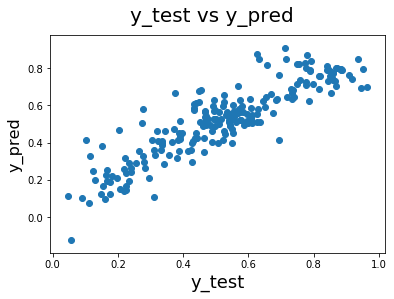

In [439]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [440]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7857742700990371